In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [3]:
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load Data ---
try:
    # Use StringIO if the data is passed as a string block,
    # otherwise load directly from file path 'car_sales.csv'
    from io import StringIO
    csv_data = """--- START OF FILE car_sales.csv ---

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28,16,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18,6,200,111,74,42,30.5,17,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23,6,216,116,78,45,30.5,21,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,6,3.8,170,4800,1690,No,18.8,5,198,108,73,41,26.5,14,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33,34.7,36.3,16,25,Driver only,Front,8,4.9,200,4100,1510,No,18,6,206,114,73,43,35,18,3620,USA,Cadillac DeVille
11,Cadillac,Seville,Midsize,37.5,40.1,42.7,16,25,Driver & Passenger,Front,8,4.6,295,6000,1985,No,20,5,204,111,74,44,31,14,3935,USA,Cadillac Seville
12,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,4,2.2,110,5200,2380,Yes,15.2,5,182,101,66,38,25,13,2490,USA,Chevrolet Cavalier
13,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,4,2.2,110,5200,2665,Yes,15.6,5,184,103,68,39,26,14,2785,USA,Chevrolet Corsica
14,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,6,3.4,160,4600,1805,Yes,15.5,4,193,101,74,43,25,13,3240,USA,Chevrolet Camaro
15,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,4,2.2,110,5200,2595,No,16.5,6,198,108,71,40,28.5,16,3195,USA,Chevrolet Lumina
16,Chevrolet,Lumina_APV,Van,14.7,16.3,18,18,23,None,Front,6,3.8,170,4800,1690,No,20,7,178,110,74,44,30.5,NA,3715,USA,Chevrolet Lumina_APV
17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,4WD,6,4.3,165,4000,1790,No,27,8,194,111,78,42,33.5,NA,4025,USA,Chevrolet Astro
18,Chevrolet,Caprice,Large,18,18.8,19.6,17,26,Driver only,Rear,8,5,170,4200,1350,No,23,6,214,116,77,42,29.5,20,3910,USA,Chevrolet Caprice
19,Chevrolet,Corvette,Sporty,34.6,38,41.5,17,25,Driver only,Rear,8,5.7,300,5000,1450,Yes,20,2,179,96,74,43,NA,NA,3380,USA,Chevrolet Corvette
20,Chrylser,Concorde,Large,18.4,18.4,18.4,20,28,Driver & Passenger,Front,6,3.3,153,5300,1990,No,18,6,203,113,74,40,31,15,3515,USA,Chrylser Concorde
21,Chrysler,LeBaron,Compact,14.5,15.8,17.1,23,28,Driver & Passenger,Front,4,3,141,5000,2090,No,16,6,183,104,68,41,30.5,14,3085,USA,Chrysler LeBaron
22,Chrysler,Imperial,Large,29.5,29.5,29.5,20,26,Driver only,Front,6,3.3,147,4800,1785,No,16,6,203,110,69,44,36,17,3570,USA,Chrysler Imperial
23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,Front,4,1.5,92,6000,3285,Yes,13.2,5,174,98,66,32,26.5,11,2270,USA,Dodge Colt
24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,Front,4,2.2,93,4800,2595,Yes,14,5,172,97,67,38,26.5,13,2670,USA,Dodge Shadow
25,Dodge,Spirit,Compact,11.9,13.3,14.7,22,27,Driver only,Front,4,2.5,100,4800,2535,Yes,16,6,181,104,68,39,30.5,14,2970,USA,Dodge Spirit
26,Dodge,Caravan,Van,13.6,19,24.4,17,21,Driver only,4WD,6,3,142,5000,1970,No,20,7,175,112,72,42,26.5,NA,3705,USA,Dodge Caravan
27,Dodge,Dynasty,Midsize,14.8,15.6,16.4,21,27,Driver only,Front,4,2.5,100,4800,2465,No,16,6,192,105,69,42,30.5,16,3080,USA,Dodge Dynasty
28,Dodge,Stealth,Sporty,18.5,25.8,33.1,18,24,Driver only,4WD,6,3,300,6000,2120,Yes,19.8,4,180,97,72,40,20,11,3805,USA,Dodge Stealth
29,Eagle,Summit,Small,7.9,12.2,16.5,29,33,None,Front,4,1.5,92,6000,2505,Yes,13.2,5,174,98,66,36,26.5,11,2295,USA,Eagle Summit
30,Eagle,Vision,Large,17.5,19.3,21.2,20,28,Driver & Passenger,Front,6,3.5,214,5800,1980,No,18,6,202,113,74,40,30,15,3490,USA,Eagle Vision
31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,Front,4,1.3,63,5000,3150,Yes,10,4,141,90,63,33,26,12,1845,USA,Ford Festiva
32,Ford,Escort,Small,8.4,10.1,11.9,23,30,None,Front,4,1.8,127,6500,2410,Yes,13.2,5,171,98,67,36,28,12,2530,USA,Ford Escort
33,Ford,Tempo,Compact,10.4,11.3,12.2,22,27,None,Front,4,2.3,96,4200,2805,Yes,15.9,5,177,100,68,39,27.5,13,2690,USA,Ford Tempo
34,Ford,Mustang,Sporty,10.8,15.9,21,22,29,Driver only,Rear,4,2.3,105,4600,2285,Yes,15.4,4,180,101,68,40,24,12,2850,USA,Ford Mustang
35,Ford,Probe,Sporty,12.8,14,15.2,24,30,Driver only,Front,4,2,115,5500,2340,Yes,15.5,4,179,103,70,38,23,18,2710,USA,Ford Probe
36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,4WD,6,3,145,4800,2080,Yes,21,7,176,119,72,45,30,NA,3735,USA,Ford Aerostar
37,Ford,Taurus,Midsize,15.6,20.2,24.8,21,30,Driver only,Front,6,3,140,4800,1885,No,16,5,192,106,71,40,27.5,18,3325,USA,Ford Taurus
38,Ford,Crown_Victoria,Large,20.1,20.9,21.7,18,26,Driver only,Rear,8,4.6,190,4200,1415,No,20,6,212,114,78,43,30,21,3950,USA,Ford Crown_Victoria
39,Geo,Metro,Small,6.7,8.4,10,46,50,None,Front,3,1,55,5700,3755,Yes,10.6,4,151,93,63,34,27.5,10,1695,non-USA,Geo Metro
40,Geo,Storm,Sporty,11.5,12.5,13.5,30,36,Driver only,Front,4,1.6,90,5400,3250,Yes,12.4,4,164,97,67,37,24.5,11,2475,non-USA,Geo Storm
41,Honda,Prelude,Sporty,17,19.8,22.7,24,31,Driver & Passenger,Front,4,2.3,160,5800,2855,Yes,15.9,4,175,100,70,39,23.5,8,2865,non-USA,Honda Prelude
42,Honda,Civic,Small,8.4,12.1,15.8,42,46,Driver only,Front,4,1.5,102,5900,2650,Yes,11.9,4,173,103,67,36,28,12,2350,non-USA,Honda Civic
43,Honda,Accord,Compact,13.8,17.5,21.2,24,31,Driver & Passenger,Front,4,2.2,140,5600,2610,Yes,17,4,185,107,67,41,28,14,3040,non-USA,Honda Accord
44,Hyundai,Excel,Small,6.8,8,9.2,29,33,None,Front,4,1.5,81,5500,2710,Yes,11.9,5,168,94,63,35,26,11,2345,non-USA,Hyundai Excel
45,Hyundai,Elantra,Small,9,10,11,22,29,None,Front,4,1.8,124,6000,2745,Yes,13.7,5,172,98,66,36,28,12,2620,non-USA,Hyundai Elantra
46,Hyundai,Scoupe,Sporty,9.1,10,11,26,34,None,Front,4,1.5,92,5550,2540,Yes,11.9,4,166,94,64,34,23.5,9,2285,non-USA,Hyundai Scoupe
47,Hyundai,Sonata,Midsize,12.4,13.9,15.3,20,27,None,Front,4,2,128,6000,2335,Yes,17.2,5,184,104,69,41,31,14,2885,non-USA,Hyundai Sonata
48,Infiniti,Q45,Midsize,45.4,47.9,50.4,17,22,Driver only,Rear,8,4.5,278,6000,1955,No,22.5,5,200,113,72,42,29,15,4000,non-USA,Infiniti Q45
49,Lexus,ES300,Midsize,27.5,28,28.4,18,24,Driver only,Front,6,3,185,5200,2325,Yes,18.5,5,188,103,70,40,27.5,14,3510,non-USA,Lexus ES300
50,Lexus,SC300,Midsize,34.7,35.2,35.6,18,23,Driver & Passenger,Rear,6,3,225,6000,2510,Yes,20.6,4,191,106,71,39,25,9,3515,non-USA,Lexus SC300
51,Lincoln,Continental,Midsize,33.3,34.3,35.3,17,26,Driver & Passenger,Front,6,3.8,160,4400,1835,No,18.4,6,205,109,73,42,30,19,3695,USA,Lincoln Continental
52,Lincoln,Town_Car,Large,34.4,36.1,37.8,18,26,Driver & Passenger,Rear,8,4.6,210,4600,1840,No,20,6,219,117,77,45,31.5,22,4055,USA,Lincoln Town_Car
53,Mazda,323,Small,7.4,8.3,9.1,29,37,None,Front,4,1.6,82,5000,2370,Yes,13.2,4,164,97,66,34,27,16,2325,non-USA,Mazda 323
54,Mazda,Protege,Small,10.9,11.6,12.3,28,36,None,Front,4,1.8,103,5500,2220,Yes,14.5,5,172,98,66,36,26.5,13,2440,non-USA,Mazda Protege
55,Mazda,626,Compact,14.3,16.5,18.7,26,34,Driver only,Front,4,2.5,164,5600,2505,Yes,15.5,5,184,103,69,40,29.5,14,2970,non-USA,Mazda 626
56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,4WD,6,3,155,5000,2240,No,19.6,7,190,110,72,39,27.5,NA,3735,non-USA,Mazda MPV
57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,rotary,1.3,255,6500,2325,Yes,20,2,169,96,69,37,NA,NA,2895,non-USA,Mazda RX-7
58,Mercedes-Benz,190E,Compact,29,31.9,34.9,20,29,Driver only,Rear,4,2.3,130,5100,2425,Yes,14.5,5,175,105,67,34,26,12,2920,non-USA,Mercedes-Benz 190E
59,Mercedes-Benz,300E,Midsize,43.8,61.9,80,19,25,Driver & Passenger,Rear,6,3.2,217,5500,2220,No,18.5,5,187,110,69,37,27,15,3525,non-USA,Mercedes-Benz 300E
60,Mercury,Capri,Sporty,13.3,14.1,15,23,26,Driver only,Front,4,1.6,100,5750,2475,Yes,11.1,4,166,95,65,36,19,6,2450,USA,Mercury Capri
61,Mercury,Cougar,Midsize,14.9,14.9,14.9,19,26,None,Rear,6,3.8,140,3800,1730,No,18,5,199,113,73,38,28,15,3610,USA,Mercury Cougar
62,Mitsubishi,Mirage,Small,7.7,10.3,12.9,29,33,None,Front,4,1.5,92,6000,2505,Yes,13.2,5,172,98,67,36,26,11,2295,non-USA,Mitsubishi Mirage
63,Mitsubishi,Diamante,Midsize,22.4,26.1,29.9,18,24,Driver only,Front,6,3,202,6000,2210,No,19,5,190,107,70,43,27.5,14,3730,non-USA,Mitsubishi Diamante
64,Nissan,Sentra,Small,8.7,11.8,14.9,29,33,Driver only,Front,4,1.6,110,6000,2435,Yes,13.2,5,170,96,66,33,26,12,2545,non-USA,Nissan Sentra
65,Nissan,Altima,Compact,13,15.7,18.3,24,30,Driver only,Front,4,2.4,150,5600,2130,Yes,15.9,5,181,103,67,40,28.5,14,3050,non-USA,Nissan Altima
66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,Front,6,3,151,4800,2065,No,20,7,190,112,74,41,27,NA,4100,non-USA,Nissan Quest
67,Nissan,Maxima,Midsize,21,21.5,22,21,26,Driver only,Front,6,3,160,5200,2045,No,18.5,5,188,104,69,41,28.5,14,3200,non-USA,Nissan Maxima
68,Oldsmobile,Achieva,Compact,13,13.5,14,24,31,None,Front,4,2.3,155,6000,2380,No,15.2,5,188,103,67,39,28,14,2910,USA,Oldsmobile Achieva
69,Oldsmobile,Cutlass_Ciera,Midsize,14.2,16.3,18.4,23,31,Driver only,Front,4,2.2,110,5200,2565,No,16.5,5,190,105,70,42,28,16,2890,USA,Oldsmobile Cutlass_Ciera
70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,Front,6,3.8,170,4800,1690,No,20,7,194,110,74,44,30.5,NA,3715,USA,Oldsmobile Silhouette
71,Oldsmobile,Eighty-Eight,Large,19.5,20.7,21.9,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18,6,201,111,74,42,31.5,17,3470,USA,Oldsmobile Eighty-Eight
72,Plymouth,Laser,Sporty,11.4,14.4,17.4,23,30,None,4WD,4,1.8,92,5000,2360,Yes,15.9,4,173,97,67,39,24.5,8,2640,USA,Plymouth Laser
73,Pontiac,LeMans,Small,8.2,9,9.9,31,41,None,Front,4,1.6,74,5600,3130,Yes,13.2,4,177,99,66,35,25.5,17,2350,USA,Pontiac LeMans
74,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,4,2,110,5200,2665,Yes,15.2,5,181,101,66,39,25,13,2575,USA,Pontiac Sunbird
75,Pontiac,Firebird,Sporty,14,17.7,21.4,19,28,Driver & Passenger,Rear,6,3.4,160,4600,1805,Yes,15.5,4,196,101,75,43,25,13,3240,USA,Pontiac Firebird
76,Pontiac,Grand_Prix,Midsize,15.4,18.5,21.6,19,27,None,Front,6,3.4,200,5000,1890,Yes,16.5,5,195,108,72,41,28.5,16,3450,USA,Pontiac Grand_Prix
77,Pontiac,Bonneville,Large,19.4,24.4,29.4,19,28,Driver & Passenger,Front,6,3.8,170,4800,1565,No,18,6,177,111,74,43,30.5,18,3495,USA,Pontiac Bonneville
78,Saab,900,Compact,20.3,28.7,37.1,20,26,Driver only,Front,4,2.1,140,6000,2910,Yes,18,5,184,99,67,37,26.5,14,2775,non-USA,Saab 900
79,Saturn,SL,Small,9.2,11.1,12.9,28,38,Driver only,Front,4,1.9,85,5000,2145,Yes,12.8,5,176,102,68,40,26.5,12,2495,USA,Saturn SL
80,Subaru,Justy,Small,7.3,8.4,9.5,33,37,None,4WD,3,1.2,73,5600,2875,Yes,9.2,4,146,90,60,32,23.5,10,2045,non-USA,Subaru Justy
81,Subaru,Loyale,Small,10.5,10.9,11.3,25,30,None,4WD,4,1.8,90,5200,3375,Yes,15.9,5,175,97,65,35,27.5,15,2490,non-USA,Subaru Loyale
82,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,4WD,4,2.2,130,5600,2330,Yes,15.9,5,179,102,67,37,27,14,3085,non-USA,Subaru Legacy
83,Suzuki,Swift,Small,7.3,8.6,10,39,43,None,Front,3,1.3,70,6000,3360,Yes,10.6,4,161,93,63,34,27.5,10,1965,non-USA,Suzuki Swift
84,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,Front,4,1.5,82,5200,3505,Yes,11.9,5,162,94,65,36,24,11,2055,non-USA,Toyota Tercel
85,Toyota,Celica,Sporty,14.2,18.4,22.6,25,32,Driver only,Front,4,2.2,135,5400,2405,Yes,15.9,4,174,99,69,39,23,13,2950,non-USA,Toyota Celica
86,Toyota,Camry,Midsize,15.2,18.2,21.2,22,29,Driver only,Front,4,2.2,130,5400,2340,Yes,18.5,5,188,103,70,38,28.5,15,3030,non-USA,Toyota Camry
87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,4WD,4,2.4,138,5000,2515,Yes,19.8,7,187,113,71,41,35,NA,3785,non-USA,Toyota Previa
88,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,4,1.8,81,5500,2550,Yes,12.4,4,163,93,63,34,26,10,2240,non-USA,Volkswagen Fox
89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34,NA,3960,non-USA,Volkswagen Eurovan
90,Volkswagen,Passat,Compact,17.6,20,22.4,21,30,None,Front,4,2,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26,15,2810,non-USA,Volkswagen Corrado
92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240
93,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,Front,5,2.4,168,6200,2310,Yes,19.3,5,184,105,69,38,30,15,3245,non-USA,Volvo 850
"""
    # Remove the header line added by the user prompt
    csv_data = csv_data.split('\n', 2)[2]
    df = pd.read_csv(StringIO(csv_data), index_col=0)
    print("Data loaded successfully.")

except FileNotFoundError:
    print("Error: car_sales.csv not found. Make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during loading: {e}")
    exit()


Data loaded successfully.


In [4]:
# --- 2. Initial Data Exploration & Cleaning ---
print("\n--- Initial Data Info ---")
df.info()


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     o

In [5]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
1        Acura  Integra    Small       12.9   15.9       18.8        25   
2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
3         Audi       90  Compact       25.9   29.1       32.3        20   
4         Audi      100  Midsize       30.8   37.7       44.6        19   
5          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
1           31                 NaN      Front  ...          5     177   
2           25  Driver & Passenger      Front  ...          5     195   
3           26         Driver only      Front  ...          5     180   
4           26  Driver & Passenger      Front  ...          6     193   
5           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
1        102   

In [6]:
print("\n--- Descriptive Statistics (Numerical) ---")
print(df.describe())


--- Descriptive Statistics (Numerical) ---
       Min.Price      Price  Max.Price   MPG.city  MPG.highway  EngineSize  \
count  93.000000  93.000000  93.000000  93.000000    93.000000   93.000000   
mean   17.125806  19.509677  21.898925  22.365591    29.086022    2.667742   
std     8.746029   9.659430  11.030457   5.619812     5.331726    1.037363   
min     6.700000   7.400000   7.900000  15.000000    20.000000    1.000000   
25%    10.800000  12.200000  14.700000  18.000000    26.000000    1.800000   
50%    14.700000  17.700000  19.600000  21.000000    28.000000    2.400000   
75%    20.300000  23.300000  25.300000  25.000000    31.000000    3.300000   
max    45.400000  61.900000  80.000000  46.000000    50.000000    5.700000   

       Horsepower          RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  \
count   93.000000    93.000000     93.000000           93.000000   93.000000   
mean   143.827957  5280.645161   2332.204301           16.664516    5.086022   
std     52.37

In [7]:
print("\n--- Descriptive Statistics (Categorical) ---")
print(df.describe(include='object'))


--- Descriptive Statistics (Categorical) ---
       Manufacturer    Model     Type      AirBags DriveTrain Cylinders  \
count            93       93       93           59         93        93   
unique           32       93        6            2          3         6   
top       Chevrolet  Integra  Midsize  Driver only      Front         4   
freq              8        1       22           43         67        49   

       Man.trans.avail Origin           Make  
count               93     93             93  
unique               2      2             93  
top                Yes    USA  Acura Integra  
freq                61     48              1  


In [8]:
# Clean column names (replace '.' with '_')
df.columns = df.columns.str.replace('.', '_', regex=False)

In [9]:
# Check for missing values ('NA' strings and standard NaN)
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())


--- Missing Values Before Cleaning ---
Manufacturer           0
Model                  0
Type                   0
Min_Price              0
Price                  0
Max_Price              0
MPG_city               0
MPG_highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev_per_mile           0
Man_trans_avail        0
Fuel_tank_capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn_circle            0
Rear_seat_room         2
Luggage_room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64


In [12]:
# Visually inspect columns with potential 'NA' strings or other placeholders
print("\nValue counts for columns with potential 'NA':")
print("Rear_seat_room:", df['Rear_seat_room'].value_counts(dropna=False).head())
print("Luggage_room:", df['Luggage_room'].value_counts(dropna=False).head())
print("Cylinders:", df['Cylinders'].value_counts(dropna=False).head())
# Replace 'NA' strings with numpy NaN
df.replace('NA', np.nan, inplace=True)


Value counts for columns with potential 'NA':
Rear_seat_room: Rear_seat_room
26.5    9
28.0    9
30.5    8
26.0    8
27.5    8
Name: count, dtype: int64
Luggage_room: Luggage_room
14.0    18
NaN     11
15.0    10
13.0     9
11.0     8
Name: count, dtype: int64
Cylinders: Cylinders
4    49
6    31
8     7
3     3
5     2
Name: count, dtype: int64


In [13]:
# Convert columns to appropriate numeric types, coercing errors
df['Rear_seat_room'] = pd.to_numeric(df['Rear_seat_room'], errors='coerce')
df['Luggage_room'] = pd.to_numeric(df['Luggage_room'], errors='coerce')


In [14]:
# Handle 'Cylinders' - map 'rotary' and convert to numeric
print("Unique Cylinders values:", df['Cylinders'].unique())
# Map 'rotary' to a numeric value (e.g., 2, as it's often considered like a 2-stroke or has 2 chambers)
# Or choose to impute/drop if preferred. Here we map.
df['Cylinders'] = df['Cylinders'].replace('rotary', 2)
df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce') # Convert others

Unique Cylinders values: ['4' '6' '8' '3' 'rotary' '5']


In [15]:
# Impute missing numerical values with the median (robust to outliers)
numerical_cols_with_nan = ['Rear_seat_room', 'Luggage_room', 'Cylinders'] # Add others if they appear
for col in numerical_cols_with_nan:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}).")


Imputed missing values in 'Rear_seat_room' with median (27.5).
Imputed missing values in 'Luggage_room' with median (14.0).


In [16]:
# Drop the 'Make' column as it seems redundant (Manufacturer + Model)
if 'Make' in df.columns:
    df.drop('Make', axis=1, inplace=True)
    print("Dropped 'Make' column.")

# Check missing values again
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())
# Any remaining NaNs would need further investigation or different imputation (e.g., mode for categoricals)

Dropped 'Make' column.

--- Missing Values After Imputation ---
Manufacturer           0
Model                  0
Type                   0
Min_Price              0
Price                  0
Max_Price              0
MPG_city               0
MPG_highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev_per_mile           0
Man_trans_avail        0
Fuel_tank_capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn_circle            0
Rear_seat_room         0
Luggage_room           0
Weight                 0
Origin                 0
dtype: int64


In [17]:
print("\n--- Data Info After Cleaning ---")
df.info() # Check data types are correct now



--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 1 to 93
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min_Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max_Price           93 non-null     float64
 6   MPG_city            93 non-null     int64  
 7   MPG_highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     int64  
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev_per_mile        93 non-null     int64  
 15  Man_trans_avail     93 non-nul

In [18]:
# Store the cleaned data before applying transformations for modeling
df_cleaned = df.copy()


In [19]:
# --- 3. Exploratory Data Analysis (EDA) with Plots ---
print("\n--- Performing Exploratory Data Analysis ---")


--- Performing Exploratory Data Analysis ---


In [20]:
# Set plot style
sns.set(style="whitegrid")


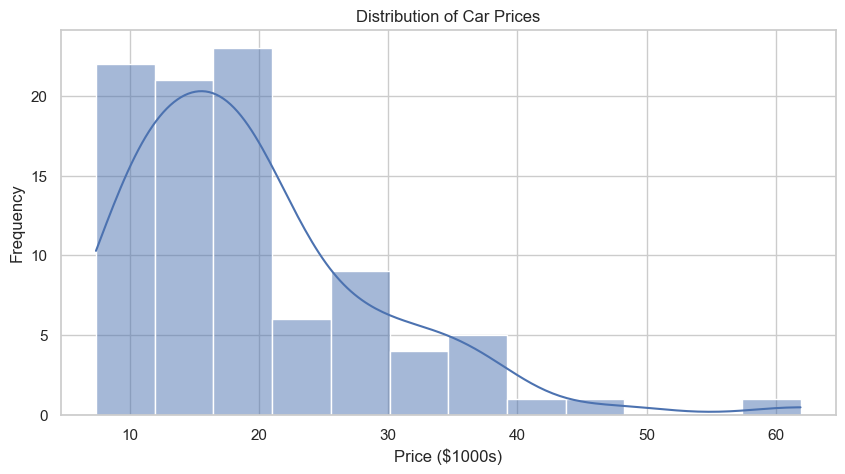

In [21]:
# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($1000s)')
plt.ylabel('Frequency')
plt.show()

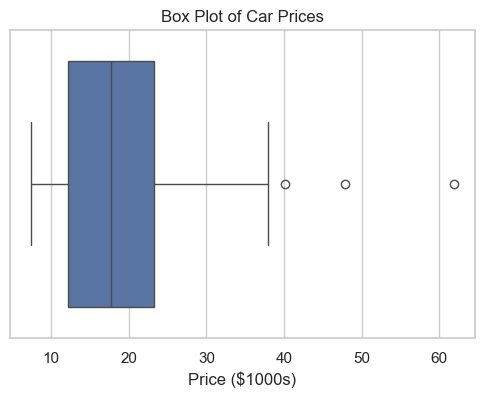

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price ($1000s)')
plt.show()

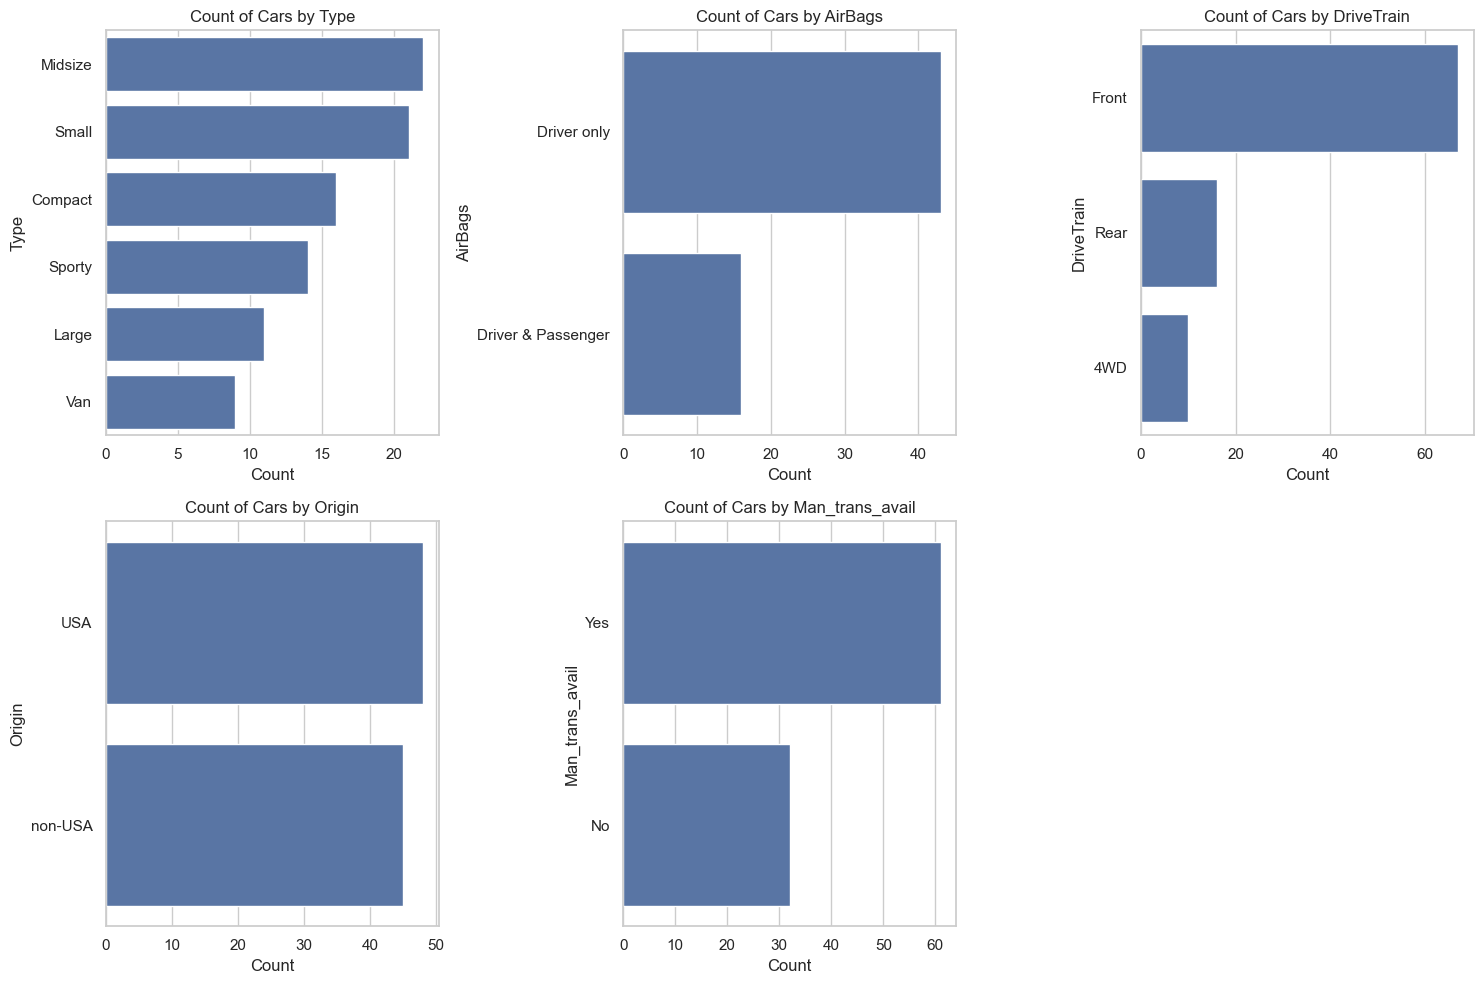

In [23]:
# Count plots for key categorical features
categorical_features = ['Type', 'AirBags', 'DriveTrain', 'Origin', 'Man_trans_avail']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index)
    plt.title(f'Count of Cars by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


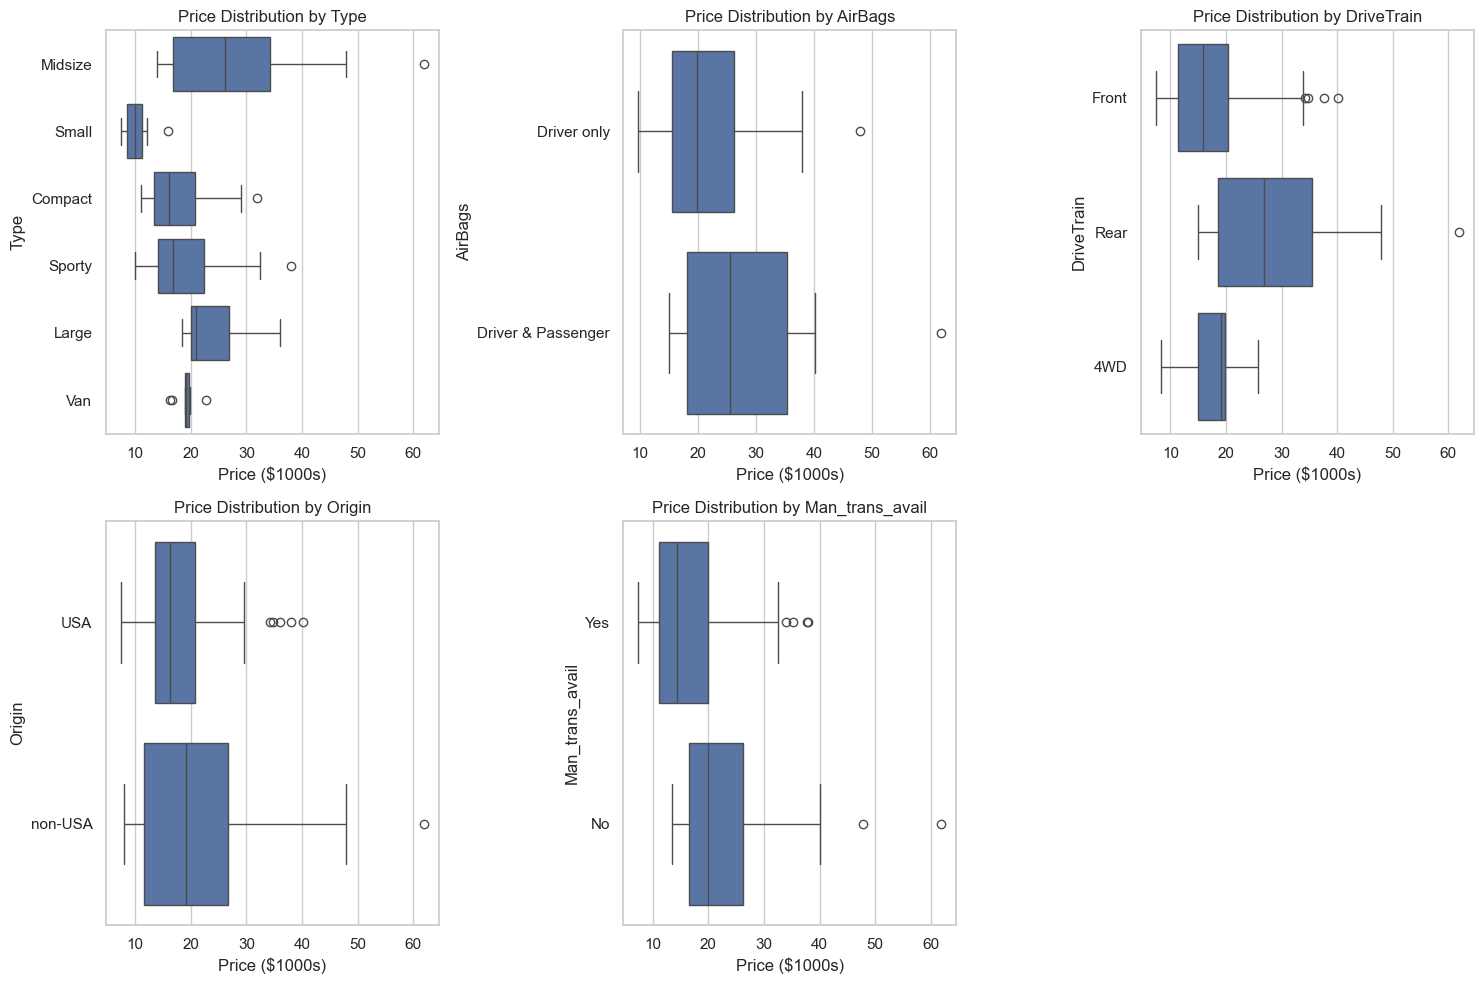

In [24]:
# Relationship between categorical features and Price
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, x='Price', data=df_cleaned, order=df_cleaned[col].value_counts().index)
    plt.title(f'Price Distribution by {col}')
    plt.xlabel('Price ($1000s)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

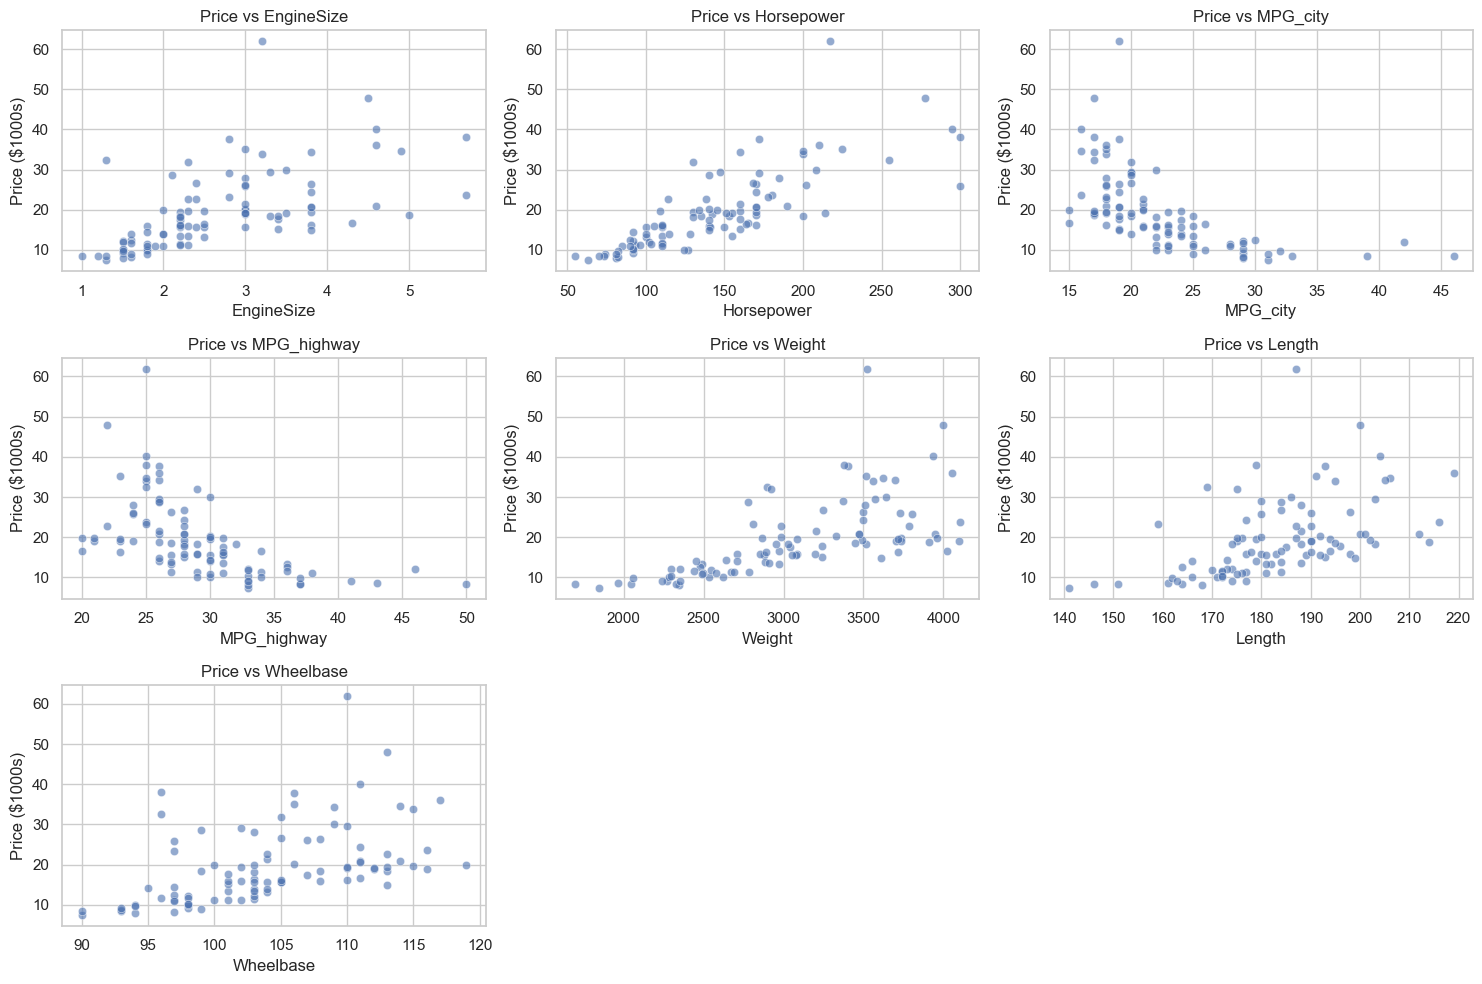

In [25]:
# Relationship between key numerical features and Price
numerical_features_corr = ['EngineSize', 'Horsepower', 'MPG_city', 'MPG_highway', 'Weight', 'Length', 'Wheelbase']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_corr):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=col, y='Price', data=df_cleaned, alpha=0.6)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price ($1000s)')
plt.tight_layout()
plt.show()


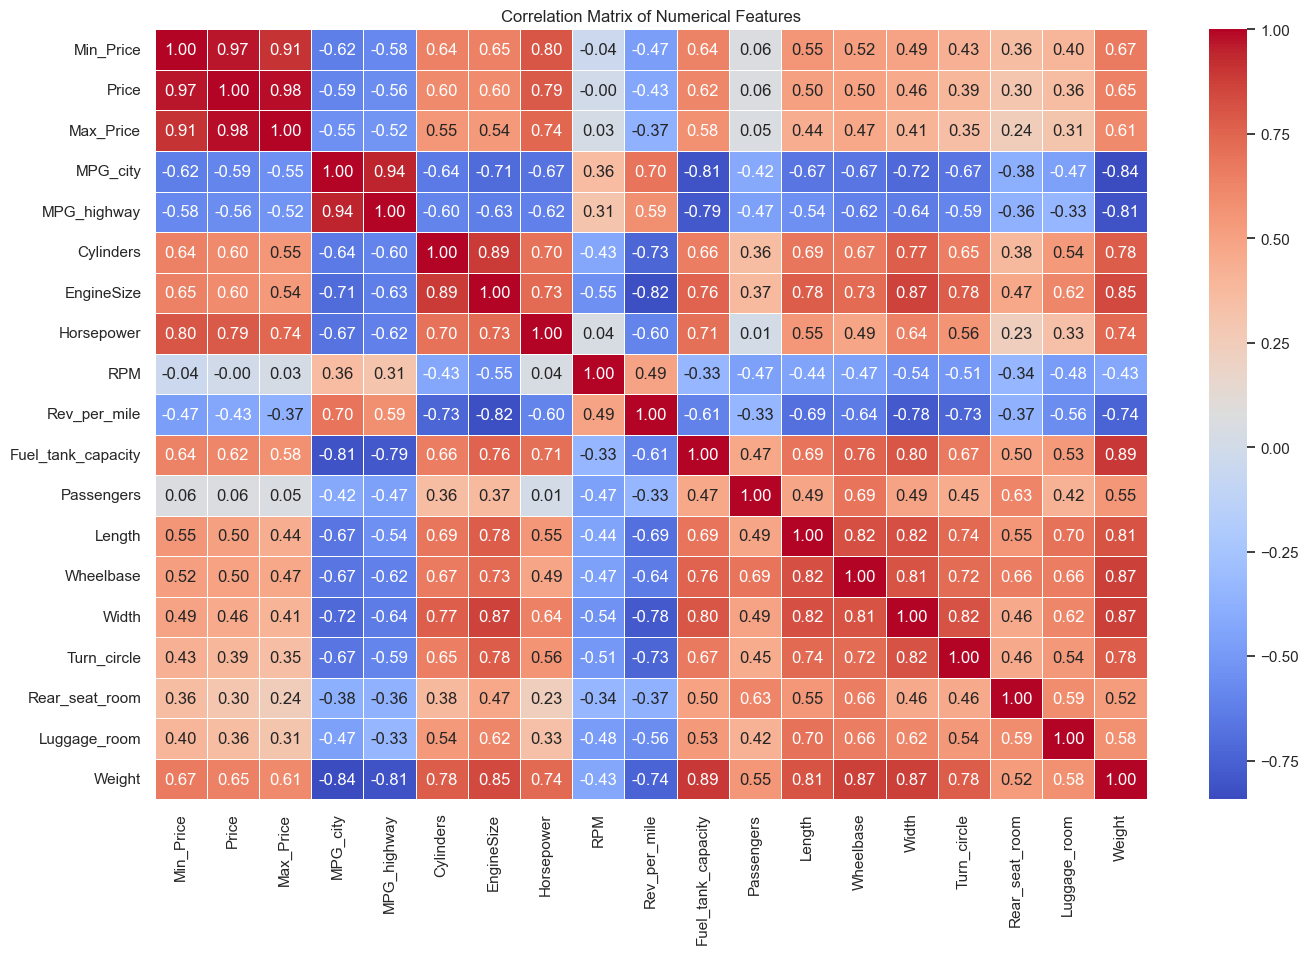


Correlation with Price:
Price                 1.000000
Max_Price             0.981580
Min_Price             0.970601
Horsepower            0.788218
Weight                0.647179
Fuel_tank_capacity    0.619480
Cylinders             0.604387
EngineSize            0.597425
Length                0.503628
Wheelbase             0.500864
Width                 0.456028
Turn_circle           0.392590
Luggage_room          0.355827
Rear_seat_room        0.297898
Passengers            0.057860
RPM                  -0.004955
Rev_per_mile         -0.426395
MPG_highway          -0.560680
MPG_city             -0.594562
Name: Price, dtype: float64


In [26]:
# Correlation Matrix for numerical features
plt.figure(figsize=(16, 10))
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\nCorrelation with Price:")
print(correlation_matrix['Price'].sort_values(ascending=False))

In [27]:
# --- 4. Save the Cleaned Data ---
cleaned_file_path = 'car_sales_cleaned.csv'
try:
    df_cleaned.to_csv(cleaned_file_path, index=True) # Keep original index if needed
    print(f"\nCleaned data saved successfully to {cleaned_file_path}")
except Exception as e:
    print(f"\nError saving cleaned data: {e}")




Cleaned data saved successfully to car_sales_cleaned.csv


In [28]:
# --- 5. Prepare Data for Modeling ---
print("\n--- Preparing Data for Modeling ---")

# Define features (X) and target (y)
# Drop highly correlated price columns if Price is the target
features_to_drop = ['Price', 'Min_Price', 'Max_Price'] # Also drop Min/Max as they define Price
# Consider dropping Model and Manufacturer if too many unique values cause high dimensionality
# or if feature importance suggests they are less critical after encoding.
# Let's keep them for now and use OneHotEncoder's handle_unknown='ignore'
features_to_drop.extend(['Model']) # Often too many unique values for simple model


--- Preparing Data for Modeling ---


In [29]:
X = df_cleaned.drop(columns=features_to_drop, errors='ignore')
y = df_cleaned['Price']

In [30]:
# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()
# Ensure 'Cylinders' and 'Passengers' are treated as numerical if they are numeric type now
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

print(f"Categorical columns for encoding: {categorical_cols}")
print(f"Numerical columns for scaling: {numerical_cols}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test.shape}, y={y_test.shape}")

Categorical columns for encoding: ['Manufacturer', 'Type', 'AirBags', 'DriveTrain', 'Man_trans_avail', 'Origin']
Numerical columns for scaling: ['MPG_city', 'MPG_highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight']
Training set shape: X=(74, 22), y=(74,)
Testing set shape: X=(19, 22), y=(19,)


In [31]:
# --- 6. Build Preprocessing Pipeline ---

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One-hot encode categorical features
])

In [32]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any) - should be none here
)


In [33]:
# --- 7. Build and Train Models ---
print("\n--- Building and Training Models ---")



--- Building and Training Models ---


In [34]:
# Define models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, random_state=42), # Alpha needs tuning
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

In [35]:
for name, model in models.items():
    print(f"Training {name}...")
    # Create the full pipeline including preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...


In [37]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
print(f"{name} Trained. R2 Score: {r2:.4f}")


Gradient Boosting Trained. R2 Score: 0.8571


In [38]:
# --- 8. Evaluate Models ---
print("\n--- Model Evaluation Results ---")

results_df = pd.DataFrame(results).T # Transpose for better readability
results_df = results_df.sort_values(by='R2', ascending=False)
print(results_df)

print("\n--- Analysis Complete ---")


--- Model Evaluation Results ---
                        MAE        MSE      RMSE        R2
Gradient Boosting  2.603685  13.646563  3.694125  0.857105

--- Analysis Complete ---
